In [1]:
import numpy as np
import pandas as pd
import sklearn
from pathlib import Path
import matplotlib.pyplot as plt
import re
from utils import *

pd.set_option('future.no_silent_downcasting', True)

In [2]:
path_data = Path("../data")

In [3]:
all_data = pd.read_pickle(path_data / "analysis_with_nan.pickle")
tractor_data = pd.read_pickle(path_data / "operator_with_nan.pickle")

In [8]:
all_data.sample(3)

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Обор.двиг.,об/мин",КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Дата и время,target
1795254,49.2,480.0,1828.000,1248.0,0.0,480.0,73.0,760.0,27.70,1828.000,2023-06-05 08:34:25,2
26210,0.0,260.0,647.375,1200.0,0.0,260.0,43.0,784.0,28.05,647.375,2023-06-19 04:49:51,0
2209748,94.8,468.0,1894.625,1264.0,0.0,468.0,74.0,760.0,28.05,1894.625,2023-06-22 17:02:51,2


In [9]:
tractor_data.sample(3)

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Обор.двиг.,об/мин",КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Дата и время,tractor_type
925159,0.0,168.0,653.000,1200.0,0.0,168.0,72.0,776.0,NaN,653.000,2023-06-06 16:33:08,C1969
2548067,94.8,460.0,1887.000,NaN,0.0,460.0,75.0,NaN,28.25,1887.000,2023-06-24 09:03:03,С1067
2679352,94.8,468.0,1905.375,1280.0,10.4,468.0,74.0,760.0,28.10,1905.375,2023-06-28 09:36:28,С1067


In [10]:
all_data.nunique()

Полож.пед.акселер.,%                          298
Давл.масла двиг.,кПа                         1501
Обор.двиг.,об/мин                           15532
КПП. Давление масла в системе смазки         3001
Скорость                                      597
ДВС. Давление смазки                         1601
ДВС. Температура охлаждающей жидкости         151
Давление в пневмостистеме (spn46), кПа        979
Электросистема. Напряжение                    258
ДВС. Частота вращения коленчатого вала      15579
Дата и время                              2522344
target                                          3
dtype: int64

In [11]:
tractor_data.nunique()

Полож.пед.акселер.,%                          251
Давл.масла двиг.,кПа                          177
Обор.двиг.,об/мин                           12268
КПП. Давление масла в системе смазки           88
Скорость                                      595
ДВС. Давление смазки                          177
ДВС. Температура охлаждающей жидкости         108
Давление в пневмостистеме (spn46), кПа         84
Электросистема. Напряжение                    240
ДВС. Частота вращения коленчатого вала      12322
Дата и время                              2358528
tractor_type                                   14
dtype: int64

In [15]:
tractor_data.shape, all_data.shape

((2666861, 12), (2856565, 12))

In [13]:
all_data.isna().sum()

Полож.пед.акселер.,%                       44211
Давл.масла двиг.,кПа                       44570
Обор.двиг.,об/мин                          47735
КПП. Давление масла в системе смазки      203269
Скорость                                  154189
ДВС. Давление смазки                       44571
ДВС. Температура охлаждающей жидкости      50442
Давление в пневмостистеме (spn46), кПа    183215
Электросистема. Напряжение                553611
ДВС. Частота вращения коленчатого вала     43516
Дата и время                                   0
target                                         0
dtype: int64

In [14]:
tractor_data.isna().sum()

Полож.пед.акселер.,%                       44211
Давл.масла двиг.,кПа                       44570
Обор.двиг.,об/мин                          47735
КПП. Давление масла в системе смазки      203269
Скорость                                  154189
ДВС. Давление смазки                       44571
ДВС. Температура охлаждающей жидкости      50442
Давление в пневмостистеме (spn46), кПа    183215
Электросистема. Напряжение                553611
ДВС. Частота вращения коленчатого вала     43516
Дата и время                                   0
tractor_type                                   0
dtype: int64

In [17]:
all_data.drop_duplicates(inplace=True, ignore_index=True)
tractor_data.drop_duplicates(inplace=True, ignore_index=True)

In [18]:
tractor_data.shape, all_data.shape

((2623314, 12), (2813018, 12))

In [42]:
data = pd.merge(all_data,
    tractor_data, 
    on=['Полож.пед.акселер.,%', 'Давл.масла двиг.,кПа', 'Обор.двиг.,об/мин',
        'КПП. Давление масла в системе смазки', 'Скорость',
        'ДВС. Давление смазки', 'ДВС. Температура охлаждающей жидкости',
        'Давление в пневмостистеме (spn46), кПа', 'Электросистема. Напряжение',
        'ДВС. Частота вращения коленчатого вала', 'Дата и время'],
    how="inner")

In [43]:
data.bfill(inplace=True)
data.ffill(inplace=True)

In [44]:
data["target"].unique()

array([0, 2])

In [45]:
data.shape

(2623314, 13)

In [46]:
data.sample(3)

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Обор.двиг.,об/мин",КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Дата и время,target,tractor_type
1119890,94.8,520.0,1907.000,1248.0,0.0,520.0,71.0,744.0,28.05,1907.000,2023-06-05 08:02:48,2,С1067
955373,94.8,488.0,1908.500,1248.0,26.8,488.0,74.0,720.0,28.20,1908.500,2023-07-15 08:30:31,2,С1067
777651,0.0,228.0,874.125,1200.0,7.6,228.0,69.0,808.0,27.60,874.125,2023-07-17 13:14:56,2,С0790


In [47]:
data.sort_values(["tractor_type", "target", "Дата и время"], ignore_index=True, axis=0, inplace=True)

In [48]:
data["tractor_type"].unique()

array(['022C4097', '023T0569', '023Т0049', '023Т0255', '023Т0719',
       'C1969', 'Р3106', 'С0790', 'С0873', 'С1067', 'С1178', 'С2177',
       'С2586', 'С2627 7226ом61'], dtype=object)

In [49]:
for tractor in data["tractor_type"].unique():
    print(data[data["tractor_type"] == tractor]["target"].nunique())

1
1
1
1
1
1
1
1
1
1
1
1
1
1


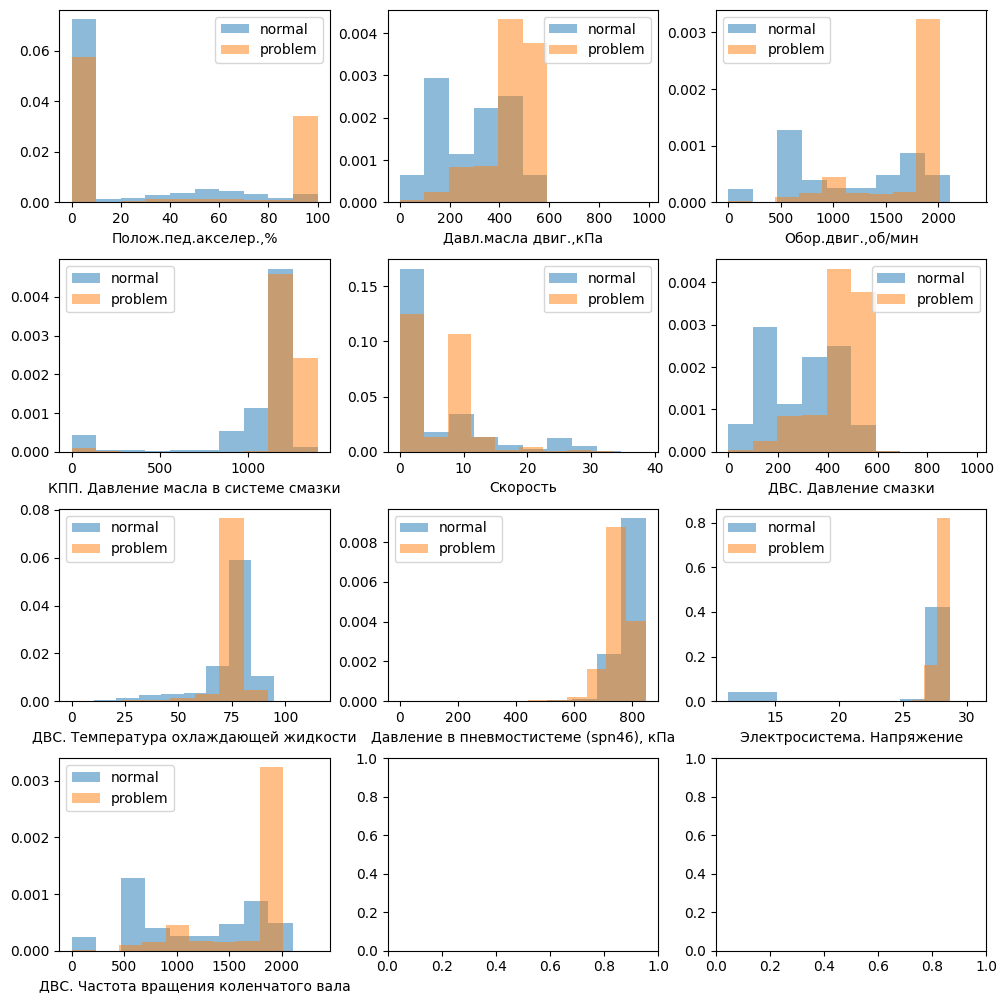

In [62]:
fig, axis = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
fig.tight_layout(h_pad=2)

for i, num_col in enumerate(numeric_cols):
    row = i // 3
    col = i % 3
    df_target_0 = data.loc[data["target"] == 0, num_col]
    df_target_2 = data.loc[data["target"] == 2, num_col]
    axis[row][col].hist(df_target_0, alpha=0.5, label="normal", density=True)
    axis[row][col].hist(df_target_2, alpha=0.5, label='problem', density=True)
    axis[row][col].legend()
    axis[row][col].set_xlabel(num_col)